In [1]:
import numpy as np
import os
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import vis
import json
from keras.models import model_from_json, load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## Read pre-trained model

In [2]:
density = '04'

#mode = 'expressive'
mode = 'receptive'


open_arch_name = 'leaky_upper_triang_RN_model_' + mode + '_arch_density_' + density + '.json'

with open(open_arch_name, 'r') as f:
    RN_model = model_from_json(f.read())
    

open_weights_name = 'leaky_upper_triang_RN_model_' + mode + '_weights_density_' + density + '.h5'

RN_model.load_weights(open_weights_name)

RN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 116, 116, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 114, 114, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 114, 114, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

x_train_shape: (116, 116, 17374)
x_test_shape: (116, 116, 8687)
y_train_shape: (17374, 1)
y_test_shape: (8687, 1)


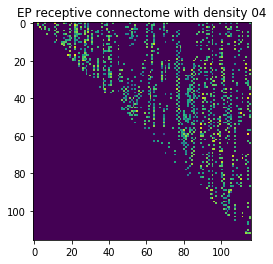

In [3]:
# Load Data

# expressive data dir
dir_name = '../../processed_data/receptive_data/'

density = '04'

# load train data

fname = 'x_train_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_train_mat = sio.loadmat(filename)['x_train_receptive_mat']
x_train_mat = np.float32(x_train_mat)

fname = 'y_train_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_train_mat = sio.loadmat(filename)['y_train_receptive_mat']
y_train_mat = np.float32(y_train_mat)

# load test data
fname = 'x_test_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_test_mat = sio.loadmat(filename)['x_test_receptive_mat']
x_test_mat = np.float32(x_test_mat)

fname = 'y_test_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_test_mat = sio.loadmat(filename)['y_test_receptive_mat']
y_test_mat = np.float32(y_test_mat)

print('x_train_shape:',x_train_mat.shape)
print('x_test_shape:',x_test_mat.shape)
print('y_train_shape:',y_train_mat.shape)
print('y_test_shape:',y_test_mat.shape)


# Form training and testing data

x_train = np.zeros((x_train_mat.shape[2],116,116,1),dtype=np.float32)
y_train = np.zeros((x_train_mat.shape[2],1),dtype=np.float32)

x_test = np.zeros((x_test_mat.shape[2],116,116,1),dtype=np.float32)
y_test = np.zeros((x_test_mat.shape[2],1),dtype=np.float32)


for i in range(x_train_mat.shape[2]):
    temp = x_train_mat[:,:,i]
    temp = np.triu(temp,1)
    x_train[i,:,:,0] = temp
    y_train[i,0] = y_train_mat[i,0] # RECEPTIVE SCORE
        
for i in range(x_test_mat.shape[2]):
    temp = x_test_mat[:,:,i]
    temp = np.triu(temp,1)
    x_test[i,:,:,0] = temp
    y_test[i,0] = y_test_mat[i,0]  # RECEPTIVE SCORE
    
    

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

input_shape = (x_train.shape[1], x_train.shape[2], 1)


x_patient_2 = x_test[2,:,:,0]


plt.figure()
plt.imshow(x_patient_2)
plt.title('EP receptive connectome with density'+' '+density)
plt.show()


In [4]:
# Test RN Model

y_test_pred = RN_model.predict(x_test)

# Print Results
print('mae: ', np.mean(np.abs(y_test - y_test_pred)))
print('sdae: ', np.std(np.abs(y_test - y_test_pred)))

count = 0
for i in range(len(y_test)):
    if (np.abs(y_test[i] - y_test_pred[i])) < 0.125: # prob of abs error less than 15 - 15/120 = 0.125
        count += 1
            
prob_error = count / len(y_test)

print('prob of mae less than 0.125: ', prob_error)

mae:  0.0063441778
sdae:  0.023851616
prob of mae less than 0.125:  0.9803154138367676


## Print layer names from pre-trained model

In [5]:
for ilayer, layer in enumerate(RN_model.layers):
    print('{:3.0f} {:10}'.format(ilayer, layer.name))

final_layer = RN_model.layers[-1]    
print(final_layer.name)

  0 input_1   
  1 conv2d_1  
  2 leaky_re_lu_1
  3 max_pooling2d_1
  4 batch_normalization_1
  5 conv2d_2  
  6 leaky_re_lu_2
  7 max_pooling2d_2
  8 batch_normalization_2
  9 conv2d_3  
 10 leaky_re_lu_3
 11 max_pooling2d_3
 12 batch_normalization_3
 13 conv2d_4  
 14 leaky_re_lu_4
 15 max_pooling2d_4
 16 batch_normalization_4
 17 lambda_1  
 18 lambda_2  
 19 lambda_4  
 20 lambda_3  
 21 concatenate_1
 22 dense_1   
 23 leaky_re_lu_5
 24 dense_2   
 25 leaky_re_lu_6
 26 dense_3   
 27 leaky_re_lu_7
 28 dense_4   
 29 leaky_re_lu_8
 30 average_1 
 31 dense_5   
 32 leaky_re_lu_9
 33 dropout_1 
 34 dense_6   
 35 leaky_re_lu_10
 36 dropout_2 
 37 dense_7   
 38 leaky_re_lu_11
 39 dense_8   
dense_8


## Read the connectome test matrix on which we want to calculate the activation map

In [6]:
# Connectome matrix of test patient
x_pat = x_test[21,:,:,0]
#x_pat = x_train[10,:,:,0]
x_pat_3 = x_pat[np.newaxis,:,:,np.newaxis]
print(x_pat_3.shape)
y_pred = RN_model.predict(x_pat_3)
img = x_pat
print(img.shape)
img = img.reshape(x_test.shape[1], x_test.shape[2], 1) # here img forms the seed_image for visualization
print(img.shape)

print(y_pred[0][0])

(1, 116, 116, 1)
(116, 116)
(116, 116, 1)
0.42432547


# GRAD-RAM

## Grad-RAM implementation from scratch

In [156]:
from vis.utils import utils
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation
import keras.backend as K
from scipy.ndimage.interpolation import zoom

In [157]:
# select score of interest - here only 1 expressive score - hence class_idx = 0
class_idx = 0
seed_input = img

# feature map from the final convolutional layer
#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_1')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_1')

#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_2')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_2')

final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_3')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_3')

#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_4')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_4')

print(final_fmap_idx)
penultimate_output = RN_model.layers[final_fmap_idx].output
print(penultimate_output)


9
Tensor("conv2d_3_7/BiasAdd:0", shape=(?, 23, 23, 32), dtype=float32)


In [158]:
layer_input = RN_model.input
print(layer_input)
fmap_func = K.function([layer_input],[penultimate_output])
print(fmap_func)

Tensor("input_1_7:0", shape=(?, 116, 116, 1), dtype=float32)


In [159]:
fmap = fmap_func([img[np.newaxis,...]])[0]
print(fmap.shape)

(1, 23, 23, 32)


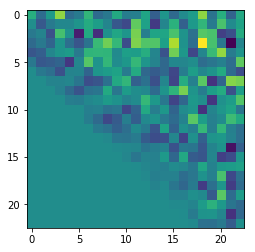

In [160]:
img1 = fmap[0,:,:,15]
#img2 = img1.T

#img3 = img1 - img2
plt.imshow(img1)
#plt.imshow(img2)
#plt.imshow(img3)
#print(img3.shape)

In [161]:
# define derivative d(loss^c) / d (A^k), k = 1,2,....32
layer_input = RN_model.input
print(layer_input)

Tensor("input_1_7:0", shape=(?, 116, 116, 1), dtype=float32)


In [162]:
layer_idx = utils.find_layer_idx(RN_model,'dense_8')
# This model is using linear activation for the final layer
loss = RN_model.layers[layer_idx].output[...,class_idx]
print(loss)

Tensor("strided_slice_10:0", shape=(?,), dtype=float32)


In [163]:
# Swap softmax with linear
RN_model.layers[layer_idx].activation = keras.activations.linear
RN_model = utils.apply_modifications(RN_model)

In [164]:
# calculate gradients
grad_wrt_fmap = K.gradients(loss,penultimate_output)[0]
print(grad_wrt_fmap)

Tensor("gradients_10/leaky_re_lu_3_7/LeakyRelu_grad/LeakyReluGrad:0", shape=(?, 23, 23, 32), dtype=float32)


In [165]:
# define function to evaluate the gradient for a given input - output is numpy array
# learning_phase is a flag - 0 = test, 1
grad_wrt_fmap_func = K.function([layer_input,K.learning_phase()],[penultimate_output,grad_wrt_fmap])
print(grad_wrt_fmap_func)

In [166]:
# evaluate the derivative function
fmap_eval, grad_wrt_fmap_eval = grad_wrt_fmap_func([img[np.newaxis,...],0])
print("Feature Map shape: ",fmap_eval.shape)
print("Gradients shape: ",grad_wrt_fmap_eval.shape)



Feature Map shape:  (1, 23, 23, 32)
Gradients shape:  (1, 23, 23, 32)


(1, 23, 23, 32)


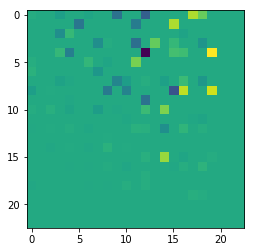

In [167]:
# normalize the gradients by maximum value - add K.epsilon for numerical stability
#grad_wrt_fmap_eval /= (np.max(grad_wrt_fmap_eval) + K.epsilon())
print(grad_wrt_fmap_eval.shape)
img2 = grad_wrt_fmap_eval[0,:,:,15]
plt.imshow(img2)

In [168]:
# obtain the weights alpha_k_c - reshape to bring it to the same shape as final fmap_eval - needed to multiply them
alpha_k_c = grad_wrt_fmap_eval.mean(axis=(0,1,2)).reshape(1,1,1,-1)
print(alpha_k_c.shape)

(1, 1, 1, 32)


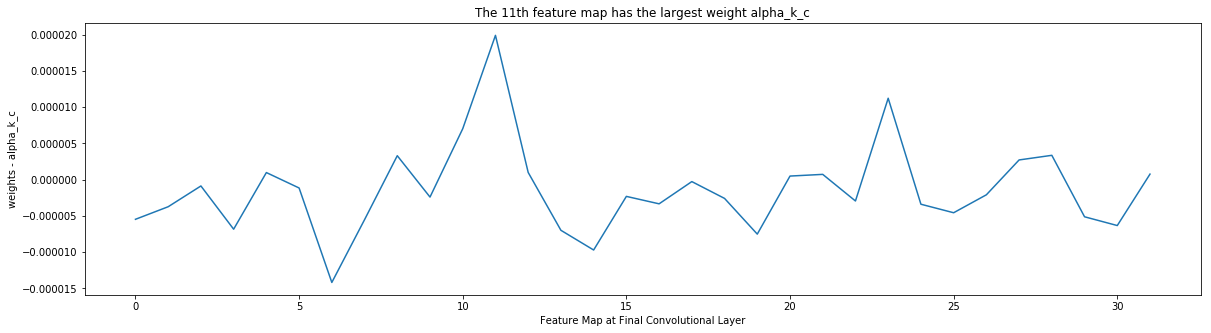

In [169]:
# visualize the weights - alpha_k_c
plt.figure(figsize=(20,5))
plt.plot(alpha_k_c.flatten())
plt.xlabel("Feature Map at Final Convolutional Layer")
plt.ylabel("weights - alpha_k_c")
plt.title("The {}th feature map has the largest weight alpha_k_c".format(np.argmax(alpha_k_c.flatten())))
plt.show()

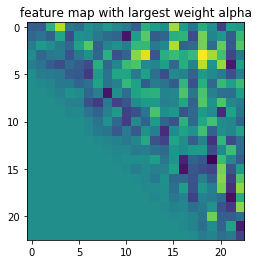

In [170]:
#visualize 15th feature map wit the largest weight
plt.imshow(fmap_eval[0,:,:,5])
plt.title("feature map with largest weight alpha")
plt.show()

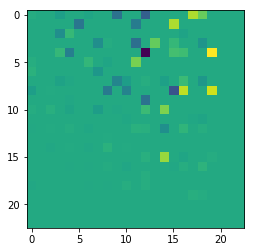

In [171]:
img1 = fmap_eval[0,:,:,5]
img2 = grad_wrt_fmap_eval[0,:,:,15]
plt.imshow(img1)
plt.imshow(img2)

In [172]:
# calculate the grad-ram activation map
L_c_grad_ram = np.maximum(np.sum(alpha_k_c*fmap_eval,axis=-1),0).squeeze()
print(L_c_grad_ram.shape)

(23, 23)


In [173]:
# upsampling the ram to match input size
scale_factor = np.array(img.shape[:-1])/np.array(L_c_grad_ram.shape)
print(scale_factor)

[5.04347826 5.04347826]


In [174]:
_grad_ram = zoom(L_c_grad_ram,scale_factor,order=3) #uses spline interpolation
print(_grad_ram.shape)

(116, 116)


In [175]:
# normalize to range in 0 to 1 - for visualization 
arr_min, arr_max = np.min(_grad_ram), np.max(_grad_ram)
grad_ram = (_grad_ram - arr_min) / (arr_max - arr_min + K.epsilon())
grad_ram = (_grad_ram) / (arr_max + K.epsilon())
grad_ram = _grad_ram
print(grad_ram.shape)

(116, 116)


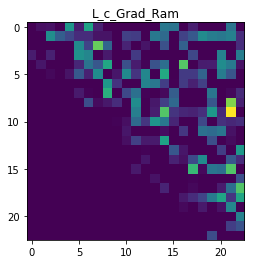

Original grad_ram Shape:  (23, 23)


In [176]:
# visualize L_c_gradram
plt.imshow(L_c_grad_ram)
plt.title("L_c_Grad_Ram")
plt.show()

print("Original grad_ram Shape: ", L_c_grad_ram.shape)

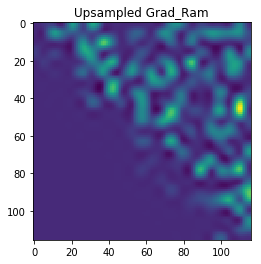

Upsampled grad ram Shape:  (116, 116)


In [177]:
# visualize upsampled grad_ram
plt.imshow(grad_ram)
plt.title("Upsampled Grad_Ram")
plt.show()

print("Upsampled grad ram Shape: ", grad_ram.shape)

## Functional implementation - grad-ram as a tool/function

In [179]:

penultimate_layer_idx = utils.find_layer_idx(RN_model,'conv2d_2')
seed_input = img
filter_indices=0

In [180]:
# calculate grad-ram
grad_ram_vis = visualize_cam(RN_model, layer_idx, filter_indices, seed_input, 
                         penultimate_layer_idx = penultimate_layer_idx,
                         backprop_modifier = 'guided',
                         grad_modifier = None) 

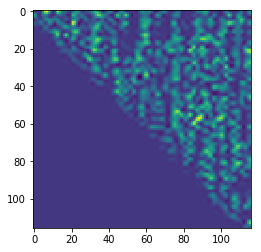

In [181]:
plt.imshow(grad_ram_vis)
#plt.imshow(grad_ram_vis.T)

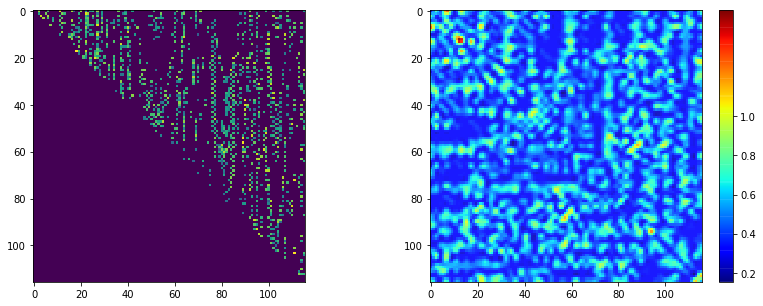

In [182]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(x_pat)    
    #axes[1].imshow(x_pat)
    grads_t = grads.T
    grads_final = (grads + grads_t)
    i = axes[1].imshow(grads_final,cmap="jet",alpha=0.9)
    fig.colorbar(i,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    
plot_map(grad_ram_vis)

In [129]:
assert np.all(np.abs(grad_ram  - grad_ram_vis) < 0.0001)

AssertionError: 

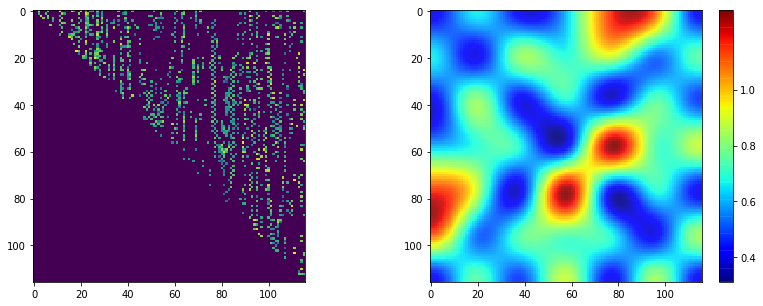

In [43]:
plot_map(np.abs(grad_ram - grad_ram_vis))

## GRAD-RAM - gradients wrt final relation pairs

In [24]:
from vis.utils import utils
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation
import keras.backend as K
from scipy.ndimage.interpolation import zoom

In [25]:
# select score of interest - here only 1 expressive score - hence class_idx = 0
class_idx = 0
seed_input = img

# feature map from the final convolutional layer
final_rmap_idx = utils.find_layer_idx(RN_model, 'activation_4')
print(final_rmap_idx)
#penultimate_output_rel = RN_model.layers[final_rmap_idx].output
penultimate_output_rel = RN_model.layers[final_rmap_idx].get_output_at(0)
print(penultimate_output_rel)

25
Tensor("activation_4/Relu:0", shape=(?, 512), dtype=float32)


In [26]:
# define derivative d(loss^c) / d (A^k), k = 1,2,....32
layer_input = RN_model.input
print(layer_input)

Tensor("input_1:0", shape=(?, 116, 116, 1), dtype=float32)


In [27]:
layer_idx = utils.find_layer_idx(RN_model,'dense_8') # final layer index
# This model is using linear activation for the final layer
loss = RN_model.layers[layer_idx].output[...,class_idx]
print(loss)

Tensor("strided_slice_1:0", shape=(?,), dtype=float32)


In [28]:
# calculate gradients
grad_wrt_rmap = K.gradients(loss,penultimate_output_rel)[0]
print(grad_wrt_rmap)

Tensor("gradients_1/average_1/add_grad/Reshape:0", shape=(?, 512), dtype=float32)
